In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from sklearn.preprocessing import LabelEncoder
from utils import create_folder
import matplotlib.gridspec as gridspec


In [2]:
plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams["font.size"] = "18"

In [3]:
lb07a = pd.read_csv("./data/proper/LB-07A.csv")
lb08a = pd.read_csv("./data/proper/LB-08A.csv")
lb07a.dropna( inplace=True)
lb08a.dropna( inplace=True)

print(lb07a.shape)
print(lb08a.shape)

(363, 7)
(419, 7)


In [5]:
label_encoder = LabelEncoder()
label_encoder.fit(lb07a.lithology)
label_encoder.classes_

array(['metagreywacke', 'monomict lithic breccia',
       'polymict lithic breccia', 'shale slate phyllite schist',
       'suevite'], dtype=object)

In [6]:
label_encoder.inverse_transform([0, 1, 2, 3, 4])

array(['metagreywacke', 'monomict lithic breccia',
       'polymict lithic breccia', 'shale slate phyllite schist',
       'suevite'], dtype=object)

In [7]:
cols_config = {
    "density": {
        "title": "Density\n[g/cc]",
        "xticks": [2.0, 2.4, 2.8],
    },
    "mag_suscep": {
        "title": "Magnetic Susceptibility\n[log₁₀ x 10⁻⁵ SI]",
        "xticks": [1.0, 1.2, 1.4, 1.6, 1.8],
    },
    "scaler_tmi": {
        "title": "Scaler TMI\n[nT]",
        "xticks": [-2500, 0, 2500],
    },
    "total_gamma": {
        "title": "Total Gamma\n[cps]",
        "xticks": [20, 40, 60, 80],
    },
    "caliper": {
        "title": "Caliper\n[mm]",
        "xticks": [95, 100, 105, 110],
    },
}

core_config = {
    "LB-07A": {"yticks": np.arange(350, 540, 50)},
    "LB-08A": {"yticks": [280, 330, 380, 430, 450]},
}


def plot_well_log(data, facies, core, file_path=None):
    logs = data.columns[1:]
    rows, cols = 1, 6
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 10), sharey=True)
    gs = gridspec.GridSpec(2, 6, height_ratios=[7, 1])

    facies_colors = ["#8080ff", "#bebebe", "#ffff00", "#7cfc00", "#8080ff"]
    facies_colormap = mcolors.ListedColormap(facies_colors)
    facies_labels = [
        "Metagreywacke",
        "Monomict lithic breccia ",
        "Polymict lithic breccia",
        "Shale, slate, phyllite and schist",
        "Suevite",
    ]


    for i in range(cols):
        if i < cols - 1:
            config = cols_config[logs[i]]
            ax = plt.subplot(gs[0, i + 1])

            ax.plot(data[logs[i]], data.depth, lw=1, c="black")
            ax.set_xlabel(f"{config['title']}", fontsize="16")
            ax.set_xticks(config["xticks"])
            ax.xaxis.set_ticks_position("top")
            ax.minorticks_on()
            ax.grid(which="major", linestyle="-", linewidth="0.5", color="lightgrey")
            ax.grid(which="minor", linestyle=":", linewidth="0.5", color="lightgrey")
            ax.set_ylim(max(data.depth), min(data.depth))
            ax.set_yticklabels([])
        elif i == cols - 1:
            F = np.vstack((facies, facies)).T
            lith_ax = plt.subplot(gs[0, 0])
            lith_ax.imshow(
                F,
                aspect="auto",
                extent=[0, 1, max(data.depth), min(data.depth)],
                cmap=facies_colormap,
            )
            lith_ax.set_xlabel("Lithology", fontsize="16")
            lith_ax.set_xticks([])

            legend_patches = [
                plt.Line2D(
                    [0],
                    [0],
                    marker="s",
                    color="w",
                    ls="",
                    label=label,
                    markerfacecolor=color,
                )
                for color, label in zip(facies_colors, facies_labels)
            ]
    for i in range(cols):
        ax = plt.subplot(gs[0, i])
        ax.set_yticks(core_config[core]["yticks"])
        ax.tick_params(axis="both", labelsize="15")

    legend_ax = plt.subplot(gs[1, :])
    legend_ax.legend(
        handles=legend_patches,
        loc="lower center",
        prop={"size": 16},
        ncols=5,
        title="Legend",
        markerscale=2.2,
        frameon=False,
        title_fontproperties={"size": 18, "weight": "bold"},
        handletextpad=0.4,
    )
    legend_ax.set_axis_off()

    plt.subplots_adjust(wspace=3, hspace=2)
    plt.tight_layout()

    if file_path is not None:
        create_folder("/".join(file_path.split("/")[:-1]))
        plt.savefig(file_path, bbox_inches="tight", format="svg")

    plt.show()

C:\Users\steve\AppData\Local\Temp\ipykernel_16960\3958677204.py:50: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(gs[0, i + 1])
C:\Users\steve\AppData\Local\Temp\ipykernel_16960\3958677204.py:63: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  lith_ax = plt.subplot(gs[0, 0])


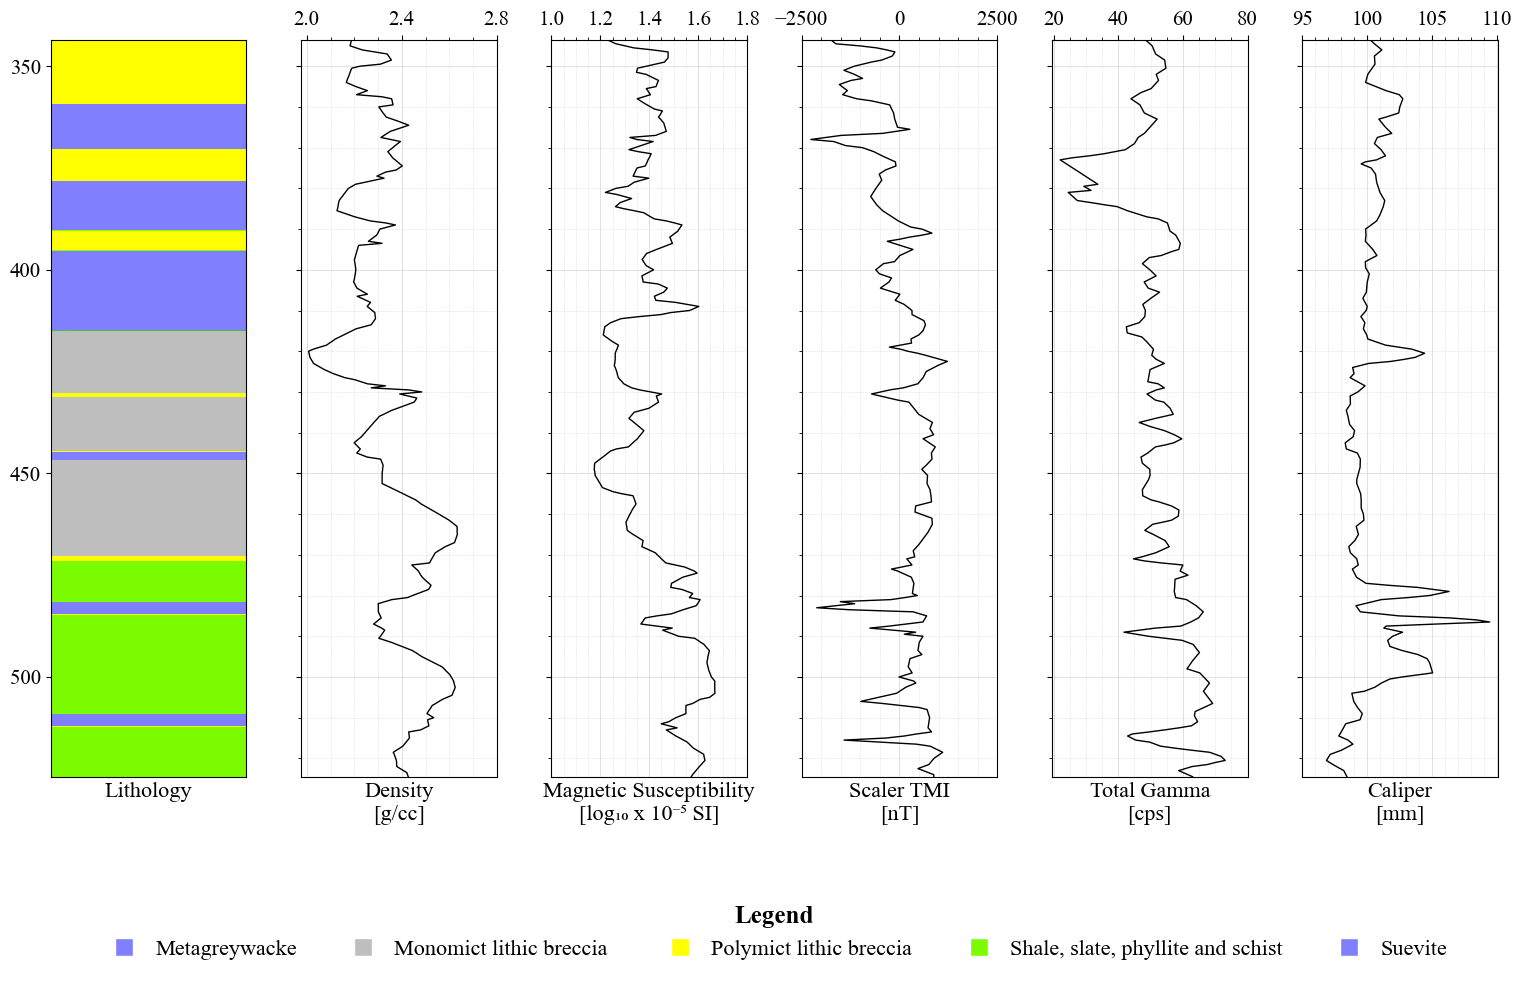

In [8]:
file_path = f"./plots/well_log_plots/LB-07A.svg"
plot_well_log(lb07a, label_encoder.transform(lb07a.lithology), "LB-07A", file_path)

C:\Users\steve\AppData\Local\Temp\ipykernel_16960\3958677204.py:50: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(gs[0, i + 1])
C:\Users\steve\AppData\Local\Temp\ipykernel_16960\3958677204.py:63: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  lith_ax = plt.subplot(gs[0, 0])


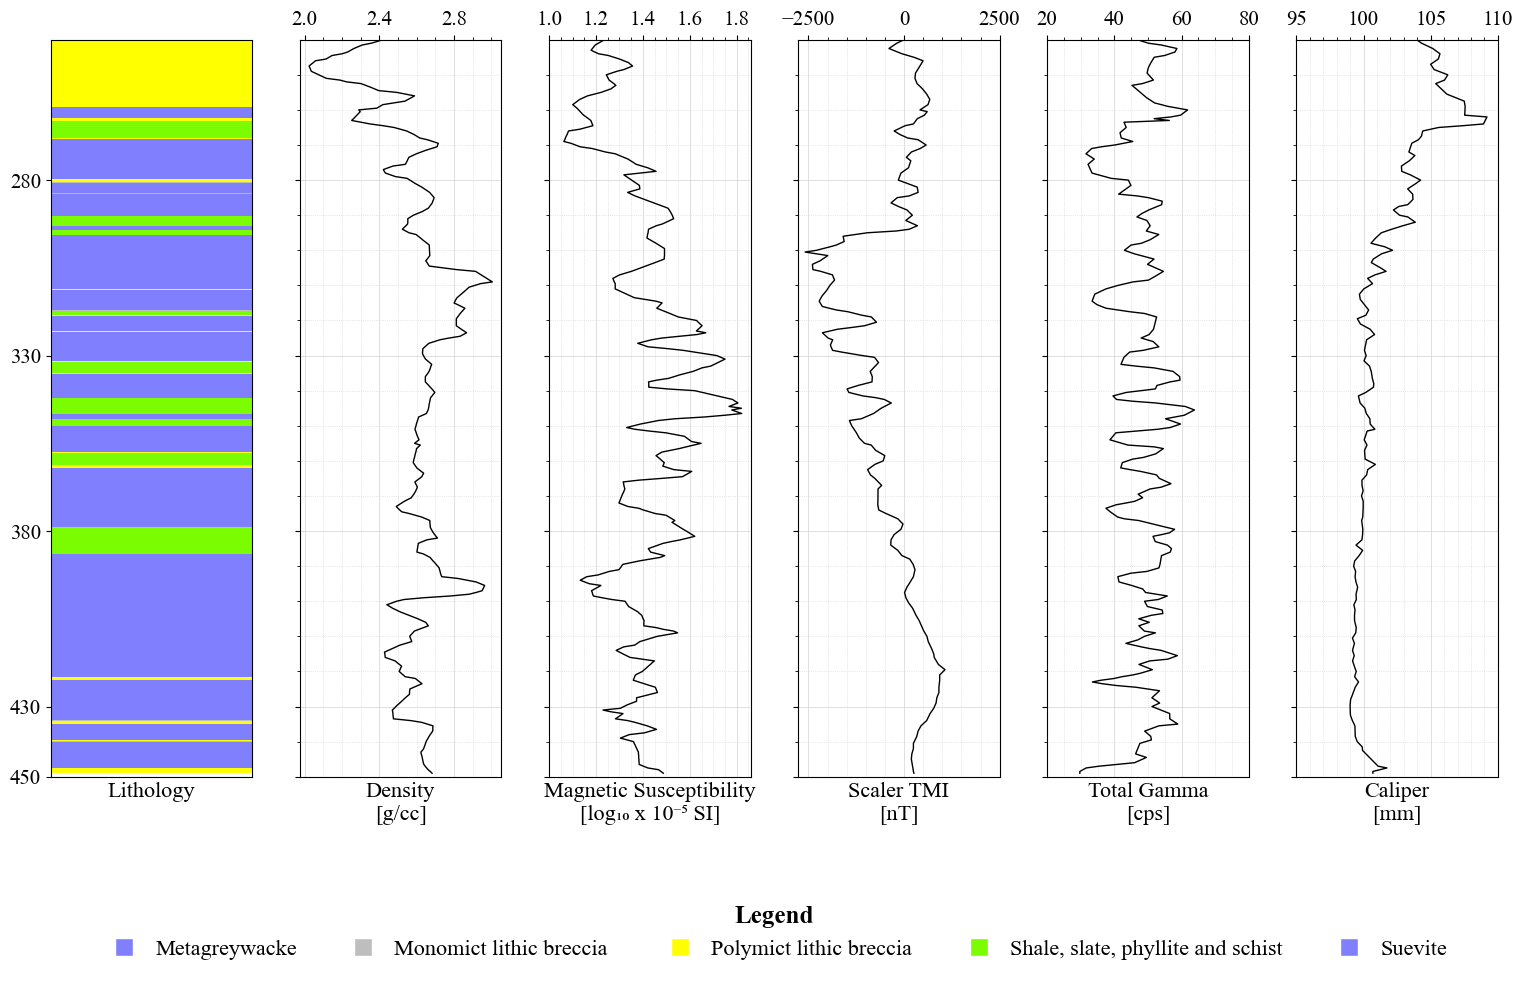

In [9]:
file_path = f"./plots/well_log_plots/LB-08A.svg"
plot_well_log(lb08a, label_encoder.transform(lb08a.lithology), "LB-08A", file_path)